## 作业1
基于Sesame，获取所有NGC天体的位置，并画图
- 根据其空间分布做进一步的阐述（选做）
- 是否各向同性
- 银道，Virgo团等

In [2]:
import matplotlib
import numpy as np
from astropy.table import Table
from astropy.io import ascii
from astropy.coordinates import SkyCoord,ICRS
from astropy import units as u
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.facecolor']='white'
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20

#### 方法1:从Simbad导入NGC catalog数据
- 数据共有20000个，其中应该包

In [7]:
from astroquery.simbad import Simbad
Simbad.TIMEOUT = 1000000
result_table = Simbad.query_catalog('ngc')
print(result_table)

 MAIN_ID        RA           DEC      ...     COO_BIBCODE     SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                                     
--------- ------------- ------------- ... ------------------- ----------------
NGC     1 00 07 15.8562 +27 42 29.020 ... 2020yCat.1350....0G                1
NGC     2 00 07 17.1156 +27 40 42.034 ... 2020yCat.1350....0G                1
NGC     3 00 07 16.7979 +08 18 05.976 ... 2020yCat.1350....0G                1
NGC     4    00 07 24.4     +08 22 30 ... 2003A&A...412...45P                1
NGC     5 00 07 48.8659 +35 21 44.143 ... 2020yCat.1350....0G                1
NGC     7    00 08 20.3     -29 55 01 ... 2003A&A...412...45P                1
NGC     8    00 08 45.3     +23 50 19 ... 2003A&A...412...45P                1
NGC     9 00 08 54.6826 +23 49 00.823 ... 2020yCat.1350....0G                1
NGC    10 00 08 34.5389 -33 51 30.197 ... 2020yCat.1350....0G                1
NGC    11  00 08 42.494  +37 26 52.39 ... 2006AJ....

In [8]:
data=Table(result_table)
data.colnames

['MAIN_ID',
 'RA',
 'DEC',
 'RA_PREC',
 'DEC_PREC',
 'COO_ERR_MAJA',
 'COO_ERR_MINA',
 'COO_ERR_ANGLE',
 'COO_QUAL',
 'COO_WAVELENGTH',
 'COO_BIBCODE',
 'SCRIPT_NUMBER_ID']

In [44]:
p = ['%s %s' % (ra,dec) for ra,dec in zip(data['RA'],data['DEC'])]
c = SkyCoord(p[:2], unit=(u.hourangle, u.deg),frame='icrs')
c.ra.value

ra_l,dec_l,name,name2=[],[],[],[]
for i in range(len(p)):
    try:
        c=SkyCoord(p[i], unit=(u.hourangle, u.deg),frame='icrs')
        ra_l.append(c.ra.value)
        dec_l.append(c.dec.value)
        name.append(data['MAIN_ID'][i])
    except:
        name2.append(data['MAIN_ID'][i])
        continue

    

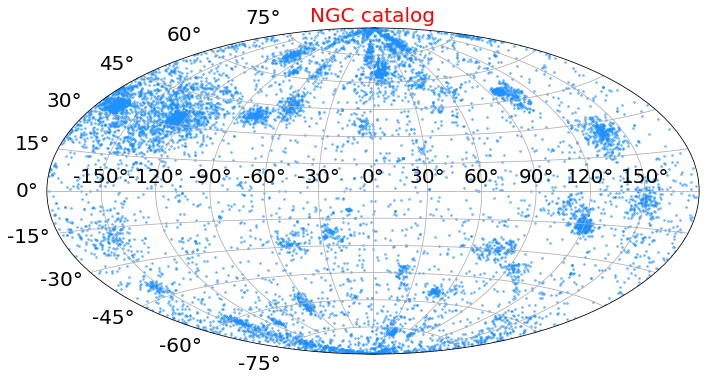

In [129]:
fig=plt.figure(figsize=(16,6))
plt.subplot(projection="aitoff")
plt.title("NGC catalog",fontsize=20,color='r')
plt.grid(True)
plt.scatter(ra_l,dec_l,s=3,color='dodgerblue',alpha=0.5)

#### 方法2:从VizieR下载NGC catalog  
- https://vizier.cds.unistra.fr/viz-bin/VizieR-2
- The catalog is a modern, revised, and expanded version of the original NGC (Dreyer 1888). 

In [64]:
data2=Table.read('/Users/guimei-liu/Downloads/VII_1B/catalog.dat',readme='/Users/guimei-liu/Downloads/VII_1B/ReadMe',format='ascii.cds')
data2.colnames

['NGC',
 'm_NGC',
 'Type',
 'RAh',
 'RAm',
 'DE-',
 'DEd',
 'DEm',
 'GLON',
 'GLAT',
 'Xpos',
 'Ypos',
 'Mag',
 'r_Mag',
 'OldDesc',
 'NewDesc',
 'Notes']

Text(0.5, 1.0, 'NGC catalog')

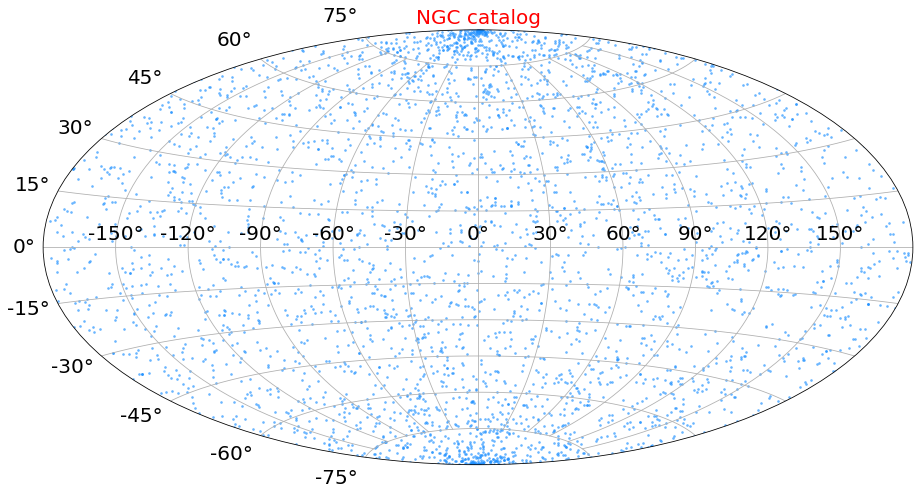

In [130]:
from turtle import color


ind=(data2['GLON'].mask==False)&(data2['GLAT'].mask==False)
l=data2[ind]['GLON']
b=data2[ind]['GLAT']
gc = SkyCoord(l=l, b=b, unit=(u.deg, u.deg),frame='galactic')
ra2,dec2=gc.icrs.ra.value,gc.icrs.dec.value


fig=plt.figure(figsize=(16,8))
plt.subplot(projection="aitoff")
plt.title("NGC catalog")
plt.grid(True)
plt.scatter(ra2,dec2,s=3,color='dodgerblue',alpha=0.5)
plt.title("NGC catalog",fontsize=20,color='r')

### 可以用循环实现
POS = []
for i in tqdm(np.arange(1, 7841)):
    POS.append(SkyCoord.from_name('NGC ' + str(i)))

## 作业2
LAMOST的视场半径2.5度，某次观测视场中心为（Ra，Dec) =（110，30），请在天球坐标中准确画出LAMOST的视场观测范围。（选做）


### 参见 http://cluster.shao.ac.cn/~shen/wiki/index.php?title=%E5%A4%A9%E5%9B%BE%E6%8A%95%E5%BD%B1%E4%B8%8A%E7%9A%84%E5%9C%86

## 作业3
  银河系的光度大概是10^11 太阳光度，半光度半径Re大约是5Kpc。(太阳的V波段绝对星等是4.8等）。  
  如果银河系距离观测者的距离是100kpc，其视星等和Re的视尺度（apparent size）各是多少？Re内的平均表面亮度是多少？如果距离是1Mpc呢？


In [6]:
L_gal=1e11  #L_sun
Re_gal=5 #kpc
d_gal=100 #kpc
V_sun=4.8 #mag



In [13]:
V_gal = -2.5*np.log10(L_gal)+V_sun
v_gal = V_gal + 5*np.log10(d_gal*1000/10)

print('银河系V-band绝对星等: %.3f mag' % V_gal)
print('银河系V-band视星等: %.3f mag' % v_gal)


银河系V-band绝对星等: -22.700 mag
银河系V-band视星等: -2.700 mag


In [14]:
size_gal=Re_gal/d_gal/np.pi*180
print('apparent size: %f degree' % size_gal )

apparent size: 2.864789 degree


In [18]:
su_bri = v_gal+2.5*np.log10(np.pi*(size_gal*3600/2)**2)
print('距离等于100kpc时，Re内表面亮度：%.2f mag/arcsec^2' % su_bri )

距离等于100kpc时，Re内表面亮度：17.10 mag/arcsec^2


In [19]:
d_gal2 = 1000 #kpc
v_gal2 = V_gal + 5*np.log10(d_gal2*1000/10)
size_gal2 = Re_gal/d_gal2/np.pi*180

su_bri2 = v_gal2+2.5*np.log10(np.pi*(size_gal2*3600/2)**2)
print('距离等于1Mpc时，Re内表面亮度：%.2f mag/arcsec^2' % su_bri2 )

距离等于1Mpc时，Re内表面亮度：17.10 mag/arcsec^2
